# Data Analysis

Analysis in this notebook take the data obtained from the openIoTwx station 
located on the NEON site.

We analyze 4 areas with the openIoTwx installed sensors listed:

* Temperature
    * Adafruit BME680 THPV qwiic sensor 
* Humidity
    * Adafruit BME680 THPV qwiic sensor
* PM2.5
    * Adafruit PMSA003i PM2.5 qwiic sensor
* Precipitation
    * Hydreon RG15 sensor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# required for output images
from pathlib import Path
Path("./outputs").mkdir(parents=True, exist_ok=True)

In [2]:
df = pd.read_csv("./data/station23_20230907_20230914_all_sensors.csv", skiprows=18)

In [3]:
df.head()

,Time,Temperature,UVAB,Humidity,Pressure,VOC (aggregate),Precipitation,Precipitation Rate,PM2.5,PM10,PM1.0,Particle Count (3um),Particle Count (5um),Particle Count (10um),Particle Count (25um),Particle Count (50um),Particle Count (100um),PM1.0 (environmental),PM2.5 (environmental),PM10 (environmental)
0,2023-09-07T00:02:54Z,17.70203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-07T00:02:55Z,NaN,NaN,39.945438,73601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-07T00:02:56Z,NaN,NaN,NaN,NaN,11432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-09-07T00:06:57Z,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-09-07T00:07:00Z,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.index =  pd.to_datetime(df['Time'])
df = df.drop('Time', axis=1)

Mean and media of Station 23 data.

* NOTE: NEON data is reported as means over a 1h time

In [5]:
df_1h_mean = df.resample('1H').mean()
df_1h_median = df.resample('1H').median()

## Temperature Analysis

In [6]:
df_temp_neon = pd.read_csv("./data/NEON.D10.RMNP.DP1.00002.001.000.010.001.SAAT_1min.2023-09.basic.20231002T213448Z.csv")
df_temp_neon.drop(df_temp_neon.columns.difference(['startDateTime','tempSingleMean']), 1, inplace=True)
df_temp_neon = df_temp_neon.rename(columns={'tempSingleMean': 'Temperature', 'startDateTime':'Time'})
df_temp_neon.index =  pd.to_datetime(df_temp_neon['Time'])
df_temp_neon = df_temp_neon.drop('Time', axis=1)
df_temp_neon.head()

C:\Users\kmaull\AppData\Local\Temp\ipykernel_27536\3651549860.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_temp_neon.drop(df_temp_neon.columns.difference(['startDateTime','tempSingleMean']), 1, inplace=True)


,Temperature
Time,
2023-09-01 00:00:00+00:00,19.9249
2023-09-01 00:01:00+00:00,20.8108
2023-09-01 00:02:00+00:00,19.7951
2023-09-01 00:03:00+00:00,19.0048
2023-09-01 00:04:00+00:00,19.2385


In [7]:
df_analysis_temp = df_temp_neon.join(df_1h_mean['Temperature'], rsuffix='[iotwx]', lsuffix="[neon]", how='inner')
df_analysis_temp

,Temperature[neon],Temperature[iotwx]
Time,,
2023-09-07 00:00:00+00:00,17.2998,16.400220
2023-09-07 01:00:00+00:00,12.5375,12.260653
2023-09-07 02:00:00+00:00,9.1742,8.919417
2023-09-07 03:00:00+00:00,7.5628,7.774339
2023-09-07 04:00:00+00:00,6.8032,7.061497
...,...,...
2023-09-13 19:00:00+00:00,15.3764,18.590451
2023-09-13 20:00:00+00:00,14.3431,16.226904
2023-09-13 21:00:00+00:00,14.0289,12.325804


### Temperature Correlation

In [8]:
df_analysis_temp.corr()
pearson_r = df_analysis_temp.corr().iloc[0,1]
print(pearson_r)

0.9808157115545024


### Temperature $R^2$


In [9]:
r2 = r2_score(df_analysis_temp.dropna().iloc[:,0], df_analysis_temp.dropna().iloc[:,1])
print(r2)

0.9108804651979234


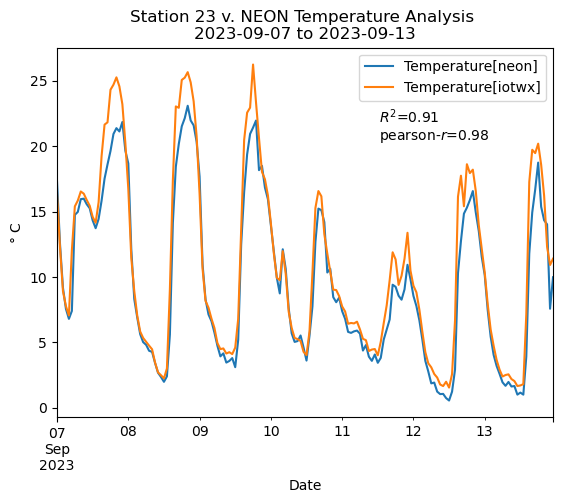

In [10]:
plt1 = df_analysis_temp.plot(xlabel="Date", ylabel="$\degree$ C", title="Station 23 v. NEON Temperature Analysis \n2023-09-07 to 2023-09-13")
plt1.text(.65,.75,f"$R^2$={r2:.2}\npearson-$r$={pearson_r:.2}",  transform=plt1.transAxes)
plt1.get_figure().savefig("outputs/station23_temp.png", dpi=300)

## Humidity Analysis

In [11]:
df_rh_neon = pd.read_csv("./data/NEON.D10.RMNP.DP1.00098.001.000.050.001.RH_1min.2023-09.basic.20231002T184934Z.csv")
df_rh_neon.drop(df_rh_neon.columns.difference(['startDateTime','RHMean']), 1, inplace=True)
df_rh_neon = df_rh_neon.rename(columns={'RHMean': 'RH', 'startDateTime':'Time'})
df_rh_neon.index =  pd.to_datetime(df_rh_neon['Time'])
df_rh_neon = df_rh_neon.drop('Time', axis=1)
df_rh_neon.head()

C:\Users\kmaull\AppData\Local\Temp\ipykernel_27536\3168771998.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rh_neon.drop(df_rh_neon.columns.difference(['startDateTime','RHMean']), 1, inplace=True)


,RH
Time,
2023-09-01 00:00:00+00:00,16.09
2023-09-01 00:01:00+00:00,17.00
2023-09-01 00:02:00+00:00,17.75
2023-09-01 00:03:00+00:00,17.82
2023-09-01 00:04:00+00:00,18.24


In [12]:
df_analysis_hum = df_rh_neon.join(df_1h_mean['Humidity'], rsuffix='[iotwx]', lsuffix="[neon]", how='inner')
df_analysis_hum.columns = ['RH[neon]', 'RH[iotwx]']

### Humdity Correlation

In [13]:
df_analysis_hum.corr()
pearson_r = df_analysis_hum.corr().iloc[0,1]
print(pearson_r)

0.8654011629634175


### Humidity $R^2$


In [14]:
r2 = r2_score(df_analysis_hum.dropna().iloc[:,0], df_analysis_hum.dropna().iloc[:,1])
print(r2)

0.7245219120395111


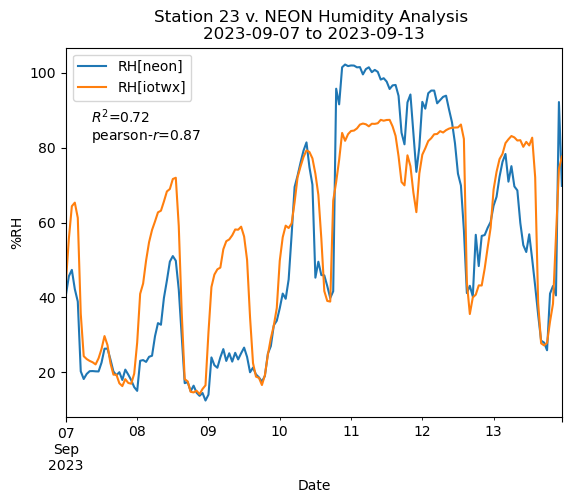

In [15]:
plt2 = df_analysis_hum.plot(xlabel="Date", ylabel="%RH",   title="Station 23 v. NEON Humidity Analysis \n2023-09-07 to 2023-09-13")
plt2.text(.05,.75,f"$R^2$={r2:.2}\npearson-$r$={pearson_r:.2}",  transform=plt2.transAxes)
plt2.get_figure().savefig("outputs/station23_humidity.png", dpi=300)

## PM2.5 Analysis

In [16]:
df_pm25_neon = pd.read_csv("./data/NEON.D10.RMNP.DP1.00017.001.000.050.030.dpsd_30_minutes.2023-09.basic.20231002T182109Z.csv")
df_pm25_neon.drop(df_pm25_neon.columns.difference(['startDateTime','PM2.5Median', 'PM2.5Minimum', 'PM2.5Maximum']), 1, inplace=True)
df_pm25_neon = df_pm25_neon.rename(columns={'startDateTime':'Time'})
df_pm25_neon.index =  pd.to_datetime(df_pm25_neon['Time'])
df_pm25_neon = df_pm25_neon.drop('Time', axis=1)
df_pm25_neon.head()

C:\Users\kmaull\AppData\Local\Temp\ipykernel_27536\2024033481.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_pm25_neon.drop(df_pm25_neon.columns.difference(['startDateTime','PM2.5Median', 'PM2.5Minimum', 'PM2.5Maximum']), 1, inplace=True)


,PM2.5Median,PM2.5Minimum,PM2.5Maximum
Time,,,
2023-09-01 00:00:00+00:00,0.002,0.001,0.020
2023-09-01 00:30:00+00:00,0.003,0.001,0.035
2023-09-01 01:00:00+00:00,0.003,0.001,0.036
2023-09-01 01:30:00+00:00,0.002,0.001,0.041
2023-09-01 02:00:00+00:00,0.006,0.002,0.054


In [17]:
df_analysis_pm25 = df_pm25_neon[['PM2.5Median']].join(df_1h_median['PM2.5'], rsuffix='[iotwx]', lsuffix="[neon]", how='inner')
df_analysis_pm25.columns = ['PM2.5[neon]', 'PM2.5[iotwx]']

In [18]:
df_analysis_pm25['PM2.5[neon]_adj'] = df_analysis_pm25['PM2.5[neon]']*1000

### PM2.5 Correlation

In [19]:
df_analysis_pm25[['PM2.5[neon]_adj', 'PM2.5[iotwx]']].corr()
pearson_r = df_analysis_pm25[['PM2.5[neon]_adj', 'PM2.5[iotwx]']].corr().iloc[0,1]
print(pearson_r)

0.8247661350370643


### PM2.5 $R^2$

In [20]:
r2 = r2_score(df_analysis_pm25.dropna().iloc[:,2], df_analysis_pm25.dropna().iloc[:,1])
print(r2)

0.4399827489849252


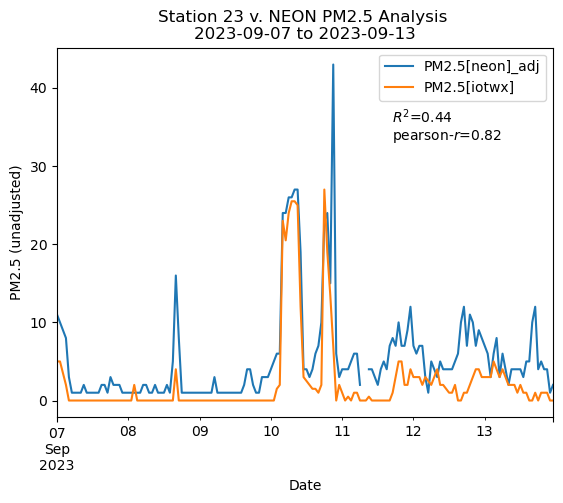

In [21]:
plt3 = df_analysis_pm25[['PM2.5[neon]_adj', 'PM2.5[iotwx]']].plot(xlabel="Date", ylabel="PM2.5 (unadjusted)",  title="Station 23 v. NEON PM2.5 Analysis \n2023-09-07 to 2023-09-13")

plt3.text(.675,.75,f"$R^2$={r2:.2}\npearson-$r$={pearson_r:.2}",  transform=plt3.transAxes)
plt3.get_figure().savefig("outputs/station23_pm25.png", dpi=300)

# Precipitation

In [22]:
df_precip_neon = pd.read_csv("./data/NEON.D10.RMNP.DP1.00006.001.003.000.030.THRPRE_30min.2023-09.basic.20231002T190744Z.csv")
df_precip_neon = df_precip_neon.rename(columns={'startDateTime':'Time'})
df_precip_neon.index =  pd.to_datetime(df_precip_neon['Time'])
df_precip_neon = df_precip_neon.drop(['endDateTime', 'TFPrecipExpUncert','TFPrecipRangeQF','TFPrecipSciRvwQF'], axis=1)
df_precip_neon = df_precip_neon.resample('1H').mean()
df_precip_neon.head()

C:\Users\kmaull\AppData\Local\Temp\ipykernel_27536\3671138687.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_precip_neon = df_precip_neon.resample('1H').mean()


,TFPrecipBulk
Time,
2023-09-01 00:00:00+00:00,0.0
2023-09-01 01:00:00+00:00,0.0
2023-09-01 02:00:00+00:00,0.0
2023-09-01 03:00:00+00:00,0.0
2023-09-01 04:00:00+00:00,0.0


In [23]:
df_analysis_precip = df_precip_neon[['TFPrecipBulk']].join(df_1h_median['Precipitation']*25.4, rsuffix='[iotwx]', lsuffix="[neon]", how='inner')

In [24]:
df_analysis_precip.iloc[:,0]

Time
2023-09-07 00:00:00+00:00    0.0000
2023-09-07 01:00:00+00:00    0.0000
2023-09-07 02:00:00+00:00    0.0000
2023-09-07 03:00:00+00:00    0.0000
2023-09-07 04:00:00+00:00    0.0000
                              ...  
2023-09-13 19:00:00+00:00    0.0000
2023-09-13 20:00:00+00:00    0.0000
2023-09-13 21:00:00+00:00    0.1285
2023-09-13 22:00:00+00:00    0.1290
2023-09-13 23:00:00+00:00    0.0320
Freq: H, Name: TFPrecipBulk, Length: 168, dtype: float64

In [25]:
r2 = r2_score(df_analysis_precip.iloc[:,0], df_analysis_precip.iloc[:,1])
print(r2)

-0.03384271653245707


In [26]:
df_analysis_precip.iloc[0]

TFPrecipBulk     0.0
Precipitation    0.0
Name: 2023-09-07 00:00:00+00:00, dtype: float64

In [27]:
df_analysis_precip[['Precipitation', 'TFPrecipBulk']].corr()
pearson_r = df_analysis_precip[['Precipitation', 'TFPrecipBulk']].corr().iloc[0,1]
print(pearson_r)

0.445112068433857


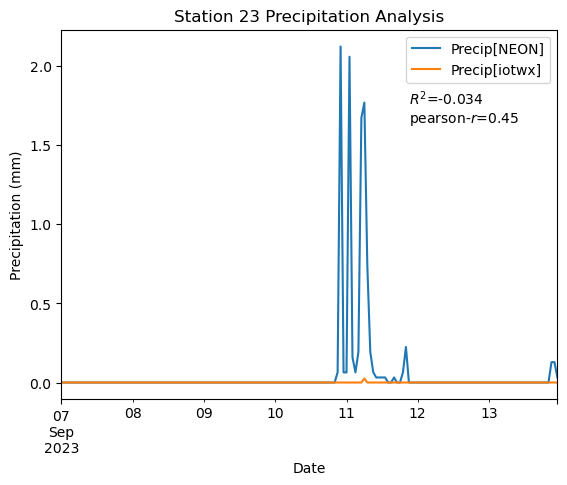

In [28]:
plt4 = df_analysis_precip.plot(xlabel="Date", ylabel="Precipitation (mm)",  title="Station 23 Precipitation Analysis")
plt4.text(.7,.75,f"$R^2$={r2:.2}\npearson-$r$={pearson_r:.2}",  transform=plt4.transAxes)
plt4.legend(["Precip[NEON]", "Precip[iotwx]"]);
plt4.get_figure().savefig("outputs/station23_precip.png", dpi=300)